In [1]:
import pandas as pd
import numpy as np
import itertools as itt
import seaborn as sns
import matplotlib.pyplot as plt

import os

from MARM.paths import get_results_path, get_figure_dir
from MARM.estimation import get_model, get_edata
from MARM.visualize import plot_and_save_fig

dataset = 'EGF_EGFR_MEKi_PRAFi_RAFi'
variant = 'base'
model_name = 'RTKERK'

figdir = get_figure_dir(model_name, variant, dataset)

In [2]:
df_sizes = pd.DataFrame(columns=['states', 'parameters', 'experiments'])

for r in range(5):
    for combo in itt.combinations(dataset.replace('_EGFR','').split('_'), r=r):
        instance = '_'.join(combo)
        model = get_model(model_name, variant, instance)
        edata = get_edata(dataset, instance, model)
        edata = [
            e
            for e in edata
            if e[3] is not None and
            (e[3].fixedParameters[model.getFixedParameterNames().index('EGFR_crispr')] != 1.0) is ('EGFR' in combo)
        ]
        df_sizes = df_sizes.append(pd.Series({
            'experiments': len(edata),
            'states': model.nx_rdata,
            'parameters': model.np() - sum(par.endswith('phi') for par in model.getParameterNames()),
        }, name=instance.replace('_',',')))
df_sizes = df_sizes.sort_values(by='states')

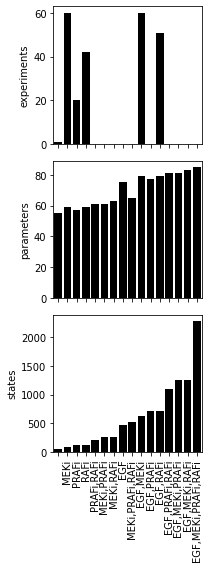

In [3]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(3, 8), sharex=True)
sns.barplot(x=df_sizes.index,y=df_sizes.experiments,ax=ax1, color='k')
sns.barplot(x=df_sizes.index,y=df_sizes.parameters,ax=ax2, color='k')
sns.barplot(x=df_sizes.index,y=df_sizes.states,ax=ax3, color='k')
plt.xticks(rotation=90)
plot_and_save_fig(figdir, 'multimodel_sizes.pdf')

In [4]:
df_sizes.experiments

                        1
MEKi                   60
PRAFi                  20
RAFi                   42
PRAFi,RAFi              0
MEKi,PRAFi              0
MEKi,RAFi               0
EGF                     0
MEKi,PRAFi,RAFi         0
EGF,MEKi               60
EGF,PRAFi               0
EGF,RAFi               51
EGF,PRAFi,RAFi          0
EGF,MEKi,PRAFi          0
EGF,MEKi,RAFi           0
EGF,MEKi,PRAFi,RAFi     0
Name: experiments, dtype: object

In [5]:
df_sizes.experiments.sum()

234

In [6]:
df_sizes.states

                         50
MEKi                     93
PRAFi                   114
RAFi                    114
PRAFi,RAFi              214
MEKi,PRAFi              259
MEKi,RAFi               259
EGF                     477
MEKi,PRAFi,RAFi         525
EGF,MEKi                622
EGF,PRAFi               712
EGF,RAFi                712
EGF,PRAFi,RAFi         1091
EGF,MEKi,PRAFi         1253
EGF,MEKi,RAFi          1253
EGF,MEKi,PRAFi,RAFi    2284
Name: states, dtype: object

In [7]:
df_sizes.parameters

                       55
MEKi                   59
PRAFi                  57
RAFi                   59
PRAFi,RAFi             61
MEKi,PRAFi             61
MEKi,RAFi              63
EGF                    75
MEKi,PRAFi,RAFi        65
EGF,MEKi               79
EGF,PRAFi              77
EGF,RAFi               79
EGF,PRAFi,RAFi         81
EGF,MEKi,PRAFi         81
EGF,MEKi,RAFi          83
EGF,MEKi,PRAFi,RAFi    85
Name: parameters, dtype: object